In [ ]:
########### Loading the data
import pandas as pd
df = pd.read_excel("https://github.com/rajaeian-fatemeh/EWE-Company-Task/raw/main/regional_averages_tm_year.xlsx")
print(df.head())

   Jahr Jahr.  Brandenburg/Berlin  Brandenburg  Baden-Wuerttemberg  Bayern  \
0  1881  year                7.55         7.54                7.66    6.61   
1  1882  year                8.99         8.97                8.08    7.33   
2  1883  year                8.42         8.41                7.77    6.85   
3  1884  year                9.11         9.10                8.44    7.52   
4  1885  year                8.40         8.39                7.82    7.04   

   Hessen  Mecklenburg-Vorpommern  Niedersachsen  \
0    7.49                    6.96           7.54   
1    8.25                    8.54           8.88   
2    7.96                    7.95           8.39   
3    8.58                    8.73           9.09   
4    7.66                    7.68           7.94   

   Niedersachsen/Hamburg/Bremen  Nordrhein-Westfalen  Rheinland-Pfalz  \
0                          7.54                 8.14             7.97   
1                          8.88                 9.03             8.55   

In [ ]:
df.shape

(143, 19)

In [ ]:
########### Selecting "Jahr" & "Deutchland"
germany_data = df[["Jahr", "Deutschland"]]
germany_data.shape

(143, 2)

In [ ]:
########### Calculating statistical measures
mean_temp = germany_data["Deutschland"].mean()
std_dev_temp = germany_data["Deutschland"].std()
min_temp = germany_data["Deutschland"].min()
max_temp = germany_data["Deutschland"].max()

########### Filtering time period from 1991 to 2020
period_1991_2020 = germany_data[(germany_data["Jahr"] >= 1991) & (germany_data["Jahr"] <= 2020)]

########### Calculating mean for period from 1991 to 2020
mean_temp_1991_2020 = period_1991_2020["Deutschland"].mean()

########### Outputs
print("Statistical Measures:")
print("Mean Temperature of the entire data is:", mean_temp)
print("Standard Deviation of Temperature of the entire data is:", std_dev_temp)
print("Minimum Temperature of the entire data is:", min_temp)
print("Maximum Temperature of the entire data is:", max_temp)
print("30-Year Average Temperature is (1991-2020):", mean_temp_1991_2020)

Statistical Measures:
Mean Temperature of the entire data is: 8.407412587412587
Standard Deviation of Temperature of the entire data is: 0.8541083096593626
Minimum Temperature of the entire data is: 6.63
Maximum Temperature of the entire data is: 10.63
30-Year Average Temperature is (1991-2020): 9.303


In [ ]:
########### Calculating temperature anomaly & add it as a new column
germany_data["Temperature_Anomaly"] = germany_data["Deutschland"] - mean_temp_1991_2020
germany_data.shape

<ipython-input-6-72181920a893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_data["Temperature_Anomaly"] = germany_data["Deutschland"] - mean_temp_1991_2020


(143, 3)

In [ ]:
print(germany_data.head())

   Jahr  Deutschland  Temperature_Anomaly
0  1881         7.31               -1.993
1  1882         8.34               -0.963
2  1883         7.88               -1.423
3  1884         8.57               -0.733
4  1885         7.74               -1.563


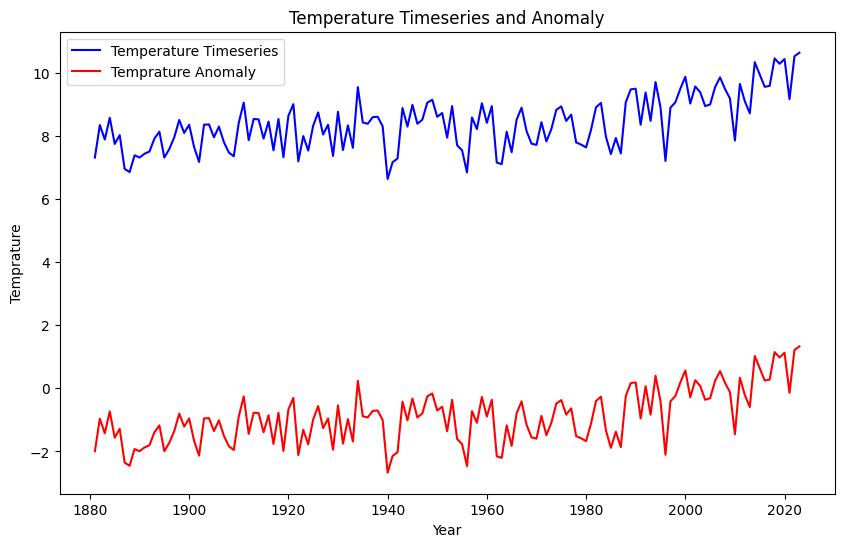

In [ ]:
########### Visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(germany_data["Jahr"], germany_data["Deutschland"], color='blue', label='Temperature Timeseries')

ax.plot(germany_data["Jahr"], germany_data["Temperature_Anomaly"], color='red', label='Temprature Anomaly')
ax.set_title('Temperature Timeseries and Anomaly')
ax.set_xlabel('Year')
ax.set_ylabel('Temprature')
ax.legend()
plt.show()

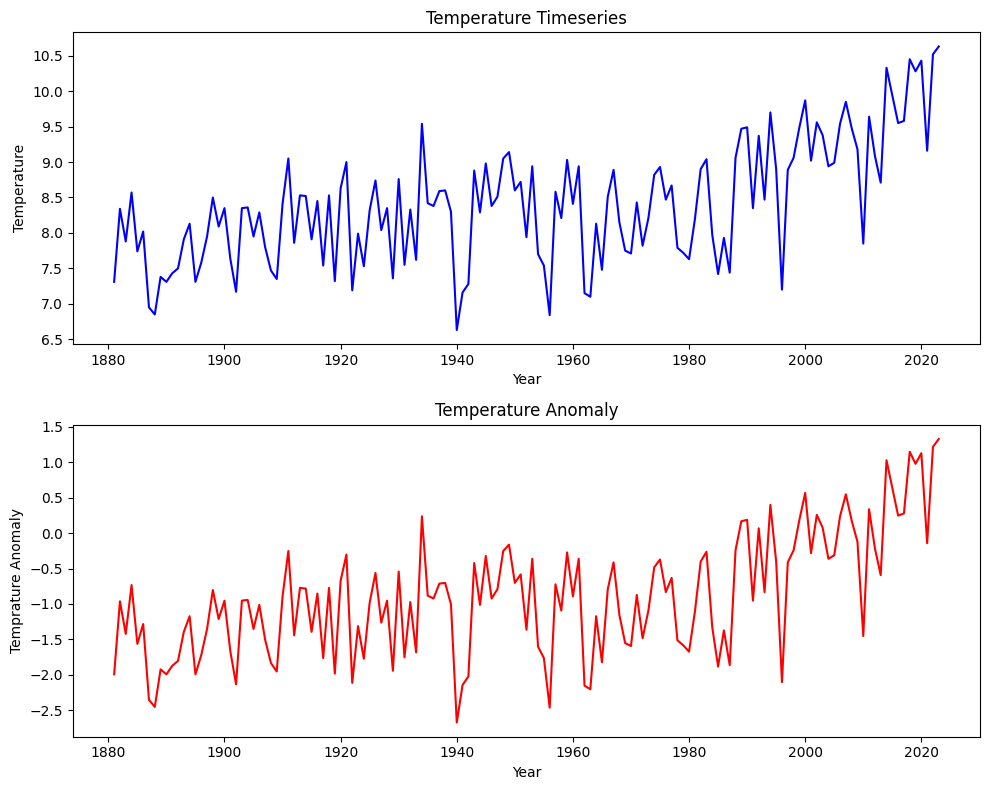

In [ ]:
########### Visualization more accurate in 2 plots
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(germany_data["Jahr"], germany_data["Deutschland"], color='blue')
ax1.set_title('Temperature Timeseries')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature')

ax2.plot(germany_data["Jahr"], germany_data["Temperature_Anomaly"], color='red')
ax2.set_title('Temperature Anomaly')
ax2.set_xlabel('Year')
ax2.set_ylabel('Temprature Anomaly')
plt.tight_layout()
plt.show()